In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from codes import district_codes
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [4]:
saved_model_path = "tomato_model.pkl"

In [5]:
tomato_model = pickle.load(open(saved_model_path,'rb'))

2023-01-12 12:43:42.119773: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ashutosh/anaconda3/envs/deep_learning/lib/
2023-01-12 12:43:42.120170: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ashutosh/anaconda3/envs/deep_learning/lib/
2023-01-12 12:43:42.120216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-01-09 15:03:46           64
config.json                                    2023-01-09 15:03:46        10758
variables.h5                                   2023-01-09 15:03:46     13297328


2023-01-12 12:43:53.451840: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-12 12:43:53.451970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ashutosh-Precision-T5610): /proc/driver/nvidia/version does not exist


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_10
.........vars
............0
............1
......dense_11
.........vars
............0
............1
......dense_12
.........vars
............0
............1
......dense_13
.........vars
............0
............1
......dense_14
.........vars
............0
............1
......dense_15
.........vars
............0
............1
......dense_16
.........vars
............0
............1
......dense_17
.........vars
............0
............1
......dense_18
.........vars
............0
............1
......dense_19
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_20
.........vars
............0
............1
......dense_21
.........vars
............0
............1
......dense_22
.........vars
............0
............1
......dense_3
...

In [6]:
tomato_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 368)               3680      
                                                                 
 dense_1 (Dense)             (None, 144)               53136     
                                                                 
 dense_2 (Dense)             (None, 400)               58000     
                                                                 
 dense_3 (Dense)             (None, 336)               134736    
                                                                 
 dense_4 (Dense)             (None, 336)               113232    
                                                                 
 dense_5 (Dense)             (None, 48)                16176     
                                                                 
 dense_6 (Dense)             (None, 304)               1

# Loading the dataset 

In [7]:
df = pd.read_csv('final_training_dataset.csv')
df.set_index('Date', inplace=True)
df.replace({'District Name' : district_codes}, inplace=True)
df.drop(['Year','Unnamed: 0'], axis=1, inplace=True)


X = df.iloc[:,:-7]
y = df.iloc[:,-6]


In [8]:
X.describe()

,District Name,ndvi,savi,ndre,Rainfall,Skin_Tmp,Max_Tmp,Min_Tmp,APAR
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
mean,8.601255,0.384539,0.254195,0.255771,1.708188,25.000766,32.004054,18.442699,93.701921
std,5.397277,0.200059,0.134044,0.154473,4.569976,8.939814,7.325010,8.064323,30.256666
min,0.000000,-0.036000,-0.042000,-0.054000,0.000000,5.480000,10.720000,0.870000,13.760000
25%,4.000000,0.201000,0.134750,0.118000,0.000000,17.017500,26.072500,10.932500,69.760000
50%,8.000000,0.362583,0.232000,0.230250,0.000000,26.650000,32.980000,19.755000,95.825000
75%,13.000000,0.552950,0.357917,0.372662,0.610000,32.132500,37.885000,25.260000,117.042500
max,18.000000,0.903500,0.657375,0.703875,50.960000,42.230000,47.570000,33.120000,158.750000


In [9]:
y.head()

Date
2018-12-16    13.831092
2018-12-23    13.831092
2018-12-30    13.831092
2019-01-06    31.328155
2019-01-27    31.328155
Name: Tomato_Yield, dtype: float64

In [10]:
df.columns

Index(['District Name', 'ndvi', 'savi', 'ndre', 'Rainfall', 'Skin_Tmp',
       'Max_Tmp', 'Min_Tmp', 'APAR', 'Potato_Yield', 'Tomato_Yield',
       'Tomato_b_Yield', 'Radish_Yield', 'Carrot_Yield', 'Cabbage_Yield',
       'Cauliflower_Yield'],
      dtype='object')

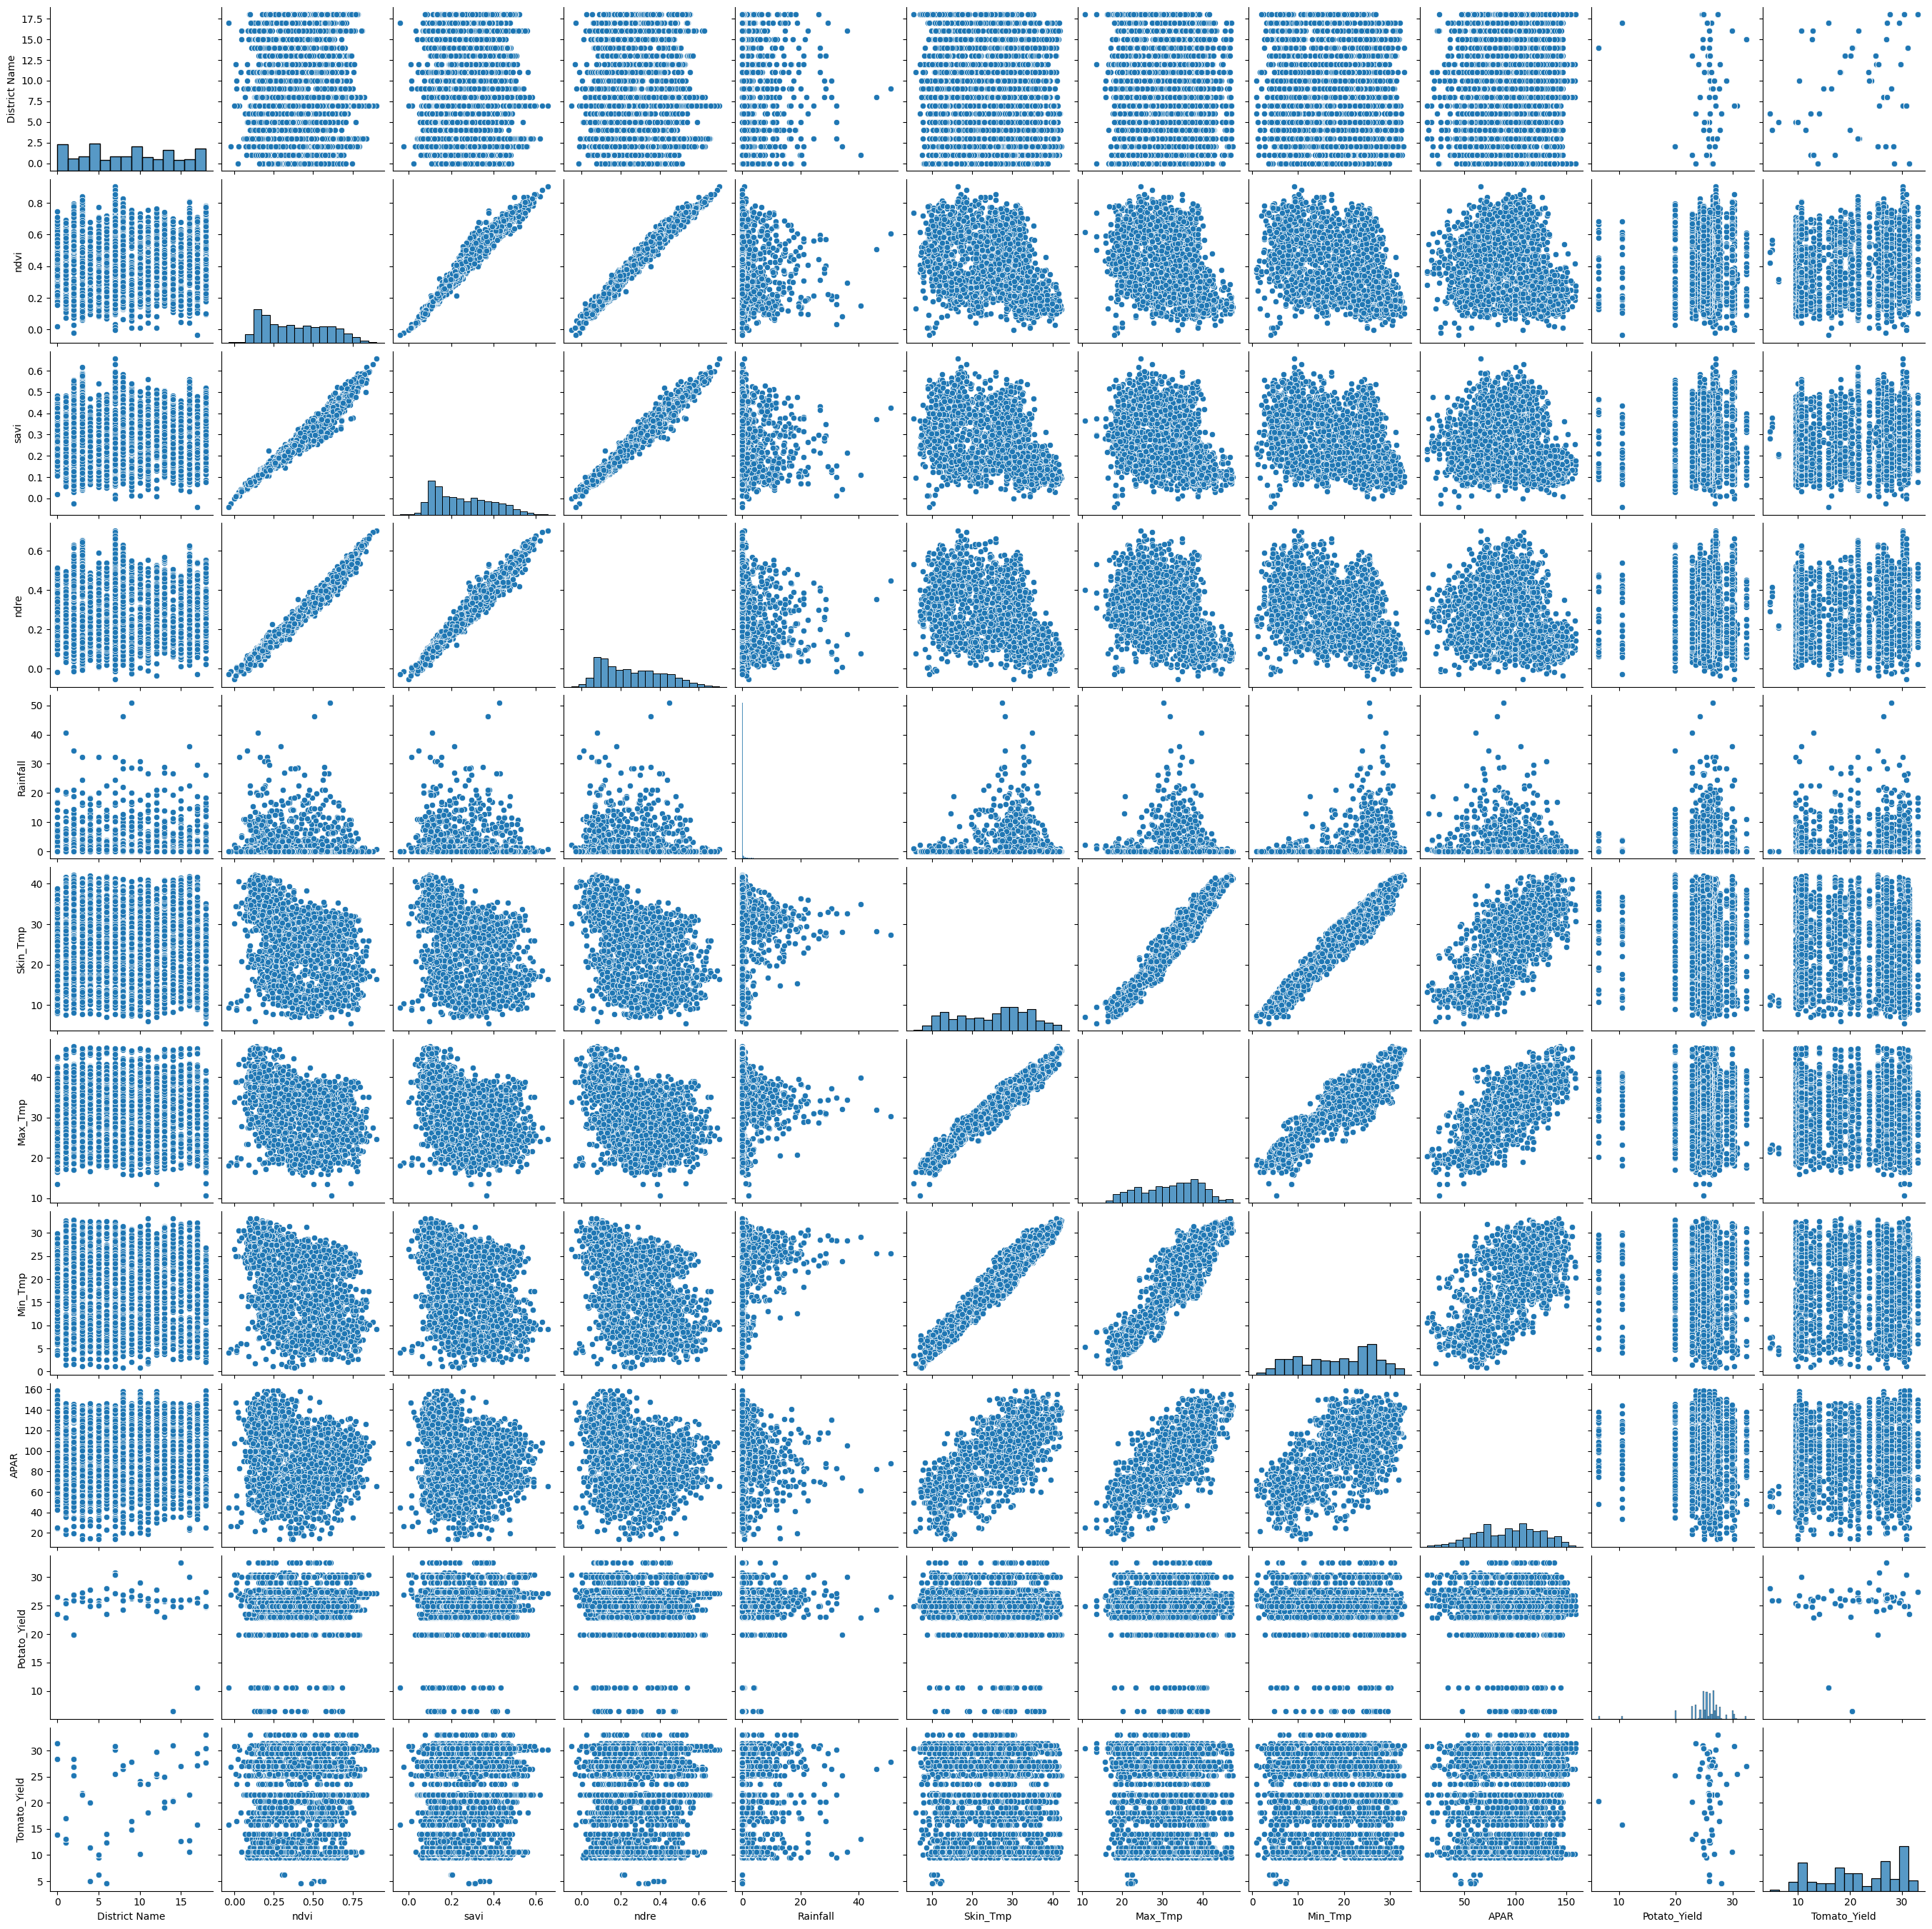

In [11]:
sns.pairplot(df[['District Name', 'ndvi', 'savi', 'ndre', 'Rainfall', 'Skin_Tmp',
       'Max_Tmp', 'Min_Tmp', 'APAR', 'Potato_Yield', 'Tomato_Yield']])

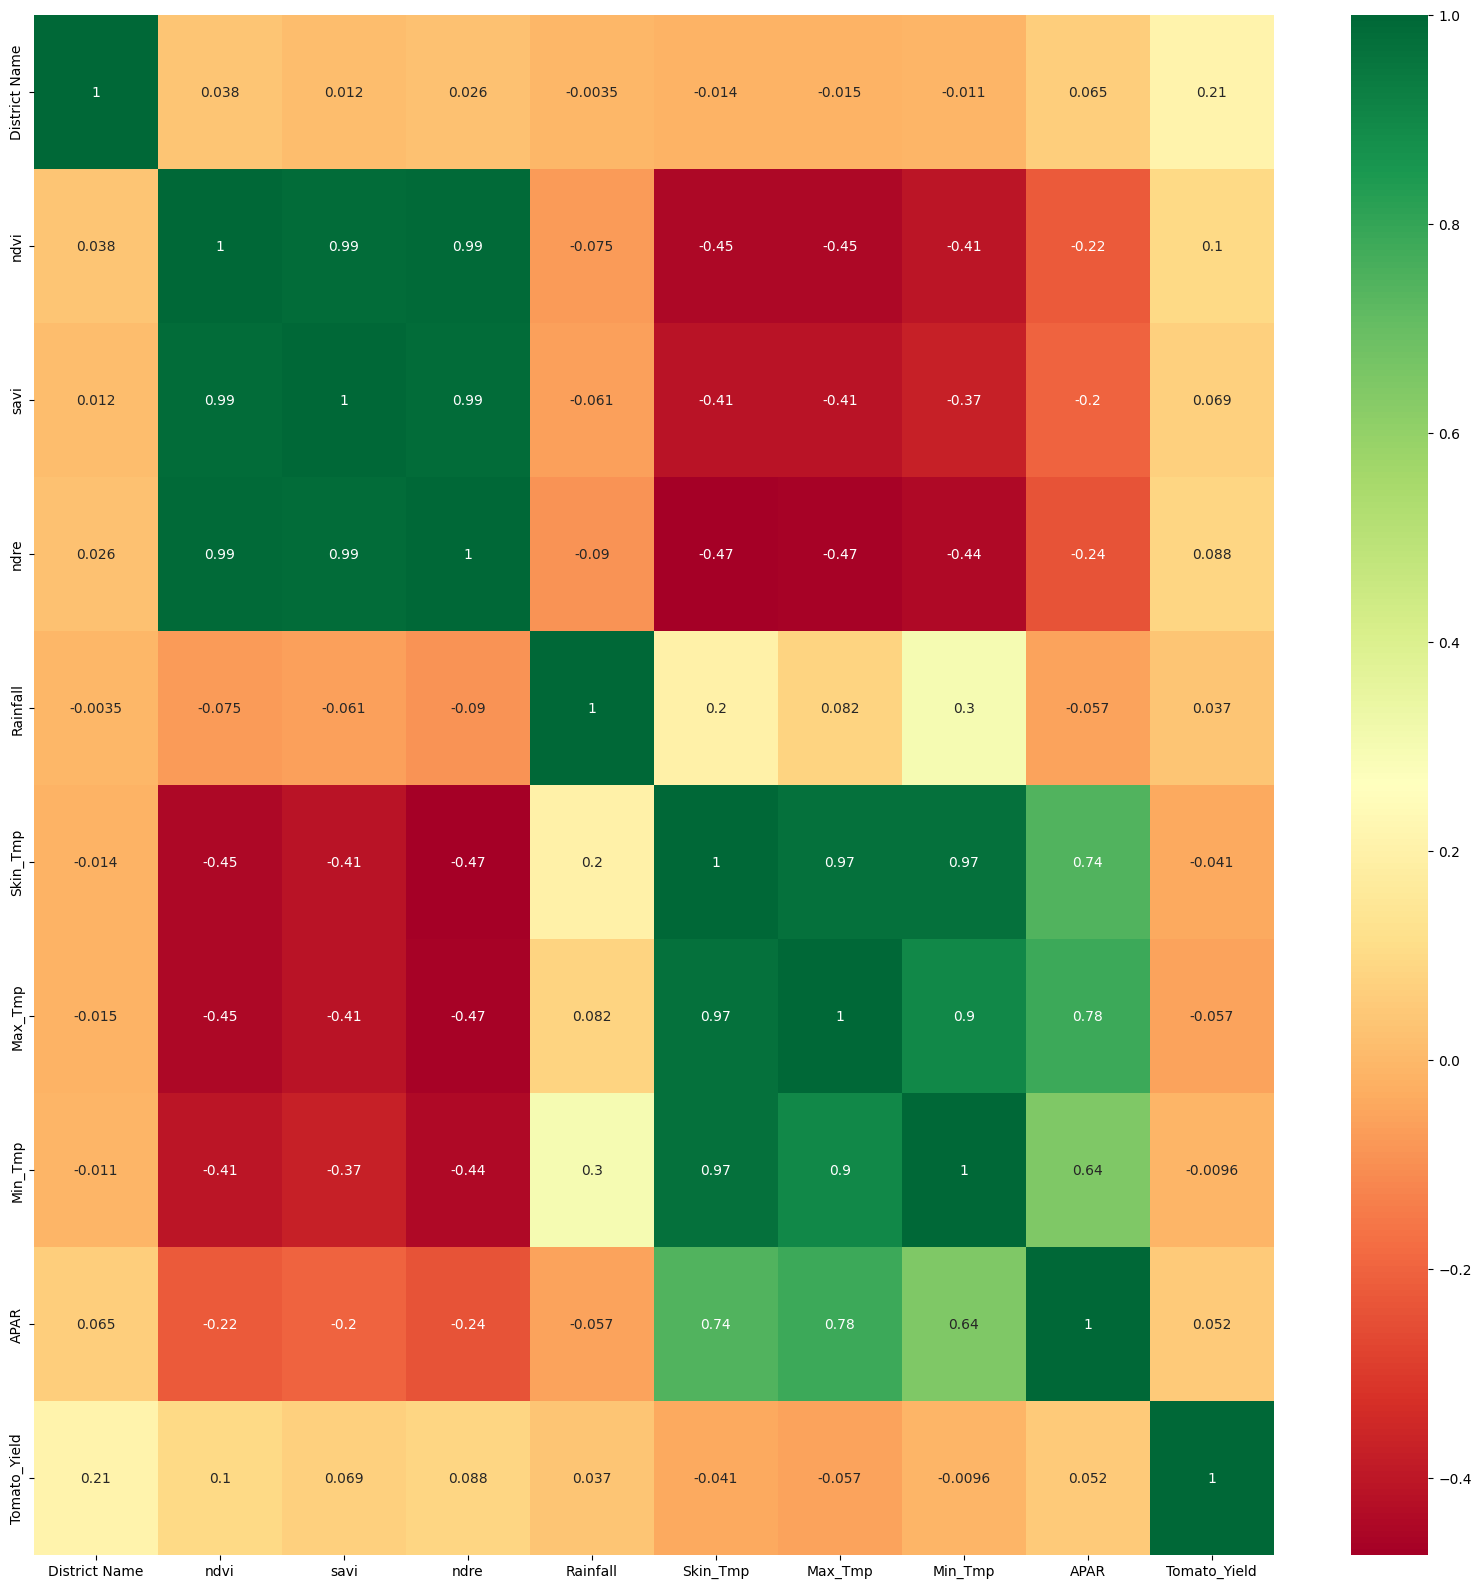

In [22]:
corrmat=df[['District Name', 'ndvi', 'savi', 'ndre', 'Rainfall', 'Skin_Tmp',
       'Max_Tmp', 'Min_Tmp', 'APAR', 'Tomato_Yield']].corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#Plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.get_figure().savefig('Correlation Plot of the Dataset')

# Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"X_train : {X_train.shape} \nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}")


X_train : (1912, 9) 
X_test : (478, 9)
y_train : (1912,)
y_test : (478,)
